In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import CIFAR100

from torch import load
import cv2

In [2]:
from visualizer import get_local
get_local.activate()

In [3]:
from model.lvt_cls import lvt_upsample
model = lvt_upsample()
state_dict = load('/root/cv-final/best_model_cvt.pth')
model.load_state_dict(state_dict['state_dict'])
model = model.cuda()

In [4]:
ori_transform = transforms.Compose([transforms.ToTensor()])

mean = np.array([125.3, 123.0, 113.9]) / 255.0
std = np.array([63.0, 62.1, 66.7]) / 255.0

normalize = transforms.Normalize(mean, std)
val_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
        ])

ori_dataset = CIFAR100(root='/root/cvmid-ass1/cifar100', train=False, download=False, transform=ori_transform)
valid_dataset = CIFAR100(root='/root/cvmid-ass1/cifar100', train=False, download=False, transform=val_transform)

In [5]:
import random

327
Label:  91


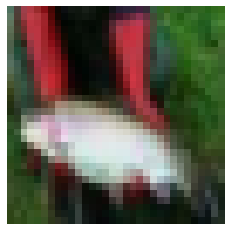

In [22]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
# num = random.randint(1, 1000)
num = 327
print(num)
pic = ori_dataset[num][0] 
print('Label: ', ori_dataset[num][1])
img = np.zeros((32, 32, 3), dtype=np.float)
img[:, :, 0] = pic[0]
img[:, :, 1] = pic[1]
img[:, :, 2] = pic[2]
plt.imshow(img)
plt.axis('off')
plt.show()

In [23]:
get_local.clear()
input_tensor=torch.unsqueeze(normalize(pic), dim=0).cuda()
output = model(input_tensor)

In [24]:
cache = get_local.cache
print(cache.keys())

dict_keys(['CSA.forward', 'Attention._inner_attention', 'ClassAttention.forward'])


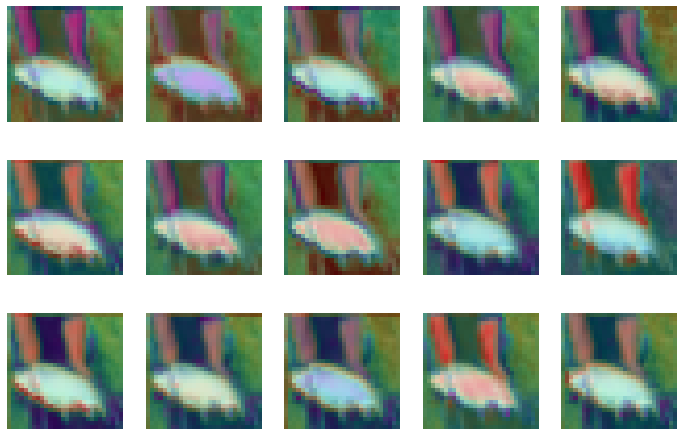

In [25]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
new_img = cv2.resize(img, (28, 28))
for i in range(3):
    for j in range(5):
        plt.subplot(3, 5, i + 1 + 3 * j)
        plt.imshow(new_img)
        plt.imshow(cache['CSA.forward'][0][0][0][:,i,j].reshape(28, 28), alpha=0.3, cmap='rainbow')
        plt.axis('off')
plt.show()

231
Label:  57


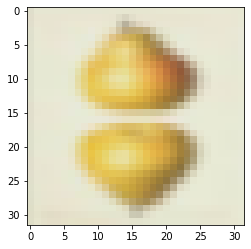

In [26]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
# num = random.randint(1, 1000)
num = 231
print(num)
pic2 = ori_dataset[num][0] 
print('Label: ', ori_dataset[num][1])
img2 = np.zeros((32, 32, 3), dtype=np.float)
img2[:, :, 0] = pic2[0]
img2[:, :, 1] = pic2[1]
img2[:, :, 2] = pic2[2]
plt.imshow(img2)
plt.axis('off')
plt.show()

In [27]:
from utils.cutmix import cutmix_pic

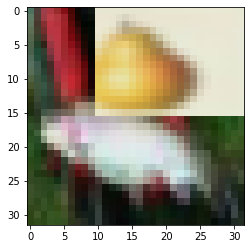

In [38]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
cutmixed_pic = cutmix_pic(pic.unsqueeze(0), pic2.unsqueeze(0))
cutmixed_pic = cutmixed_pic.squeeze(0)
img_cutmixed = np.zeros((32, 32, 3), dtype=np.float)
img_cutmixed[:, :, 0] = cutmixed_pic[0]
img_cutmixed[:, :, 1] = cutmixed_pic[1]
img_cutmixed[:, :, 2] = cutmixed_pic[2]
plt.imshow(img_cutmixed)
plt.axis('off')
plt.show()

In [39]:
get_local.clear()
input_tensor2=torch.unsqueeze(normalize(cutmixed_pic), dim=0).cuda()
output = model(input_tensor2)
cache = get_local.cache
print(cache.keys())

dict_keys(['CSA.forward', 'Attention._inner_attention', 'ClassAttention.forward'])


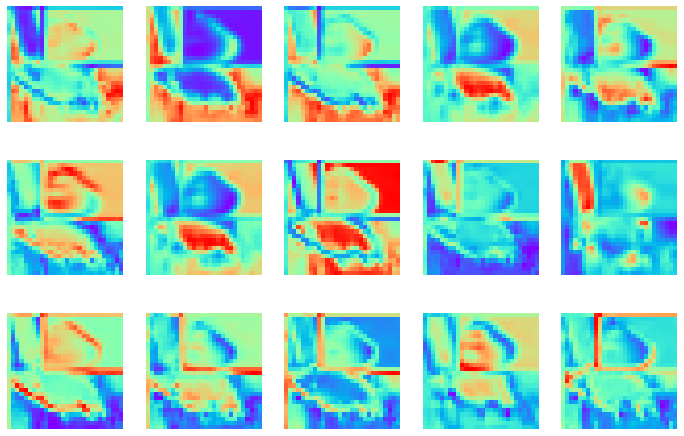

In [41]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
new_img = cv2.resize(img_cutmixed, (28, 28), interpolation=cv2.INTER_NEAREST)
for i in range(3):
    for j in range(5):
        plt.subplot(3, 5, i + 1 + 3 * j)
        # plt.imshow(new_img)
        plt.imshow(cache['CSA.forward'][0][0][0][:,i,j].reshape(28, 28), cmap='rainbow')
        plt.axis('off')
plt.show()